### Add objects to Gazebo

In [12]:
import rospy,rosnode,tf,os
from IPython.display import Image
from gazebo_msgs.srv import DeleteModel,SpawnModel
from geometry_msgs.msg import *
print ("Package loaded")

Package loaded


#### Check ros node

In [2]:
print ("ROS nodes:")
for _nIdx,_node in enumerate(rosnode.get_node_names()):
    print (" [%d] %s"%(_nIdx,_node))

ROS nodes:
 [0] /robot_state_publisher
 [1] /baxter_emulator
 [2] /baxter_sim_kinematics_left
 [3] /base_to_world
 [4] /rosout
 [5] /gazebo_gui
 [6] /baxter_sim_kinematics_right
 [7] /baxter_ctrl
 [8] /baxter_sim_io
 [9] /gazebo


#### Initialize ros node 

In [3]:
rospy.init_node("spawn_objects")
rospy.wait_for_service("gazebo/delete_model")
rospy.wait_for_service("gazebo/spawn_sdf_model")
print("Got it.")

Got it.


#### Check ros node

In [4]:
print ("ROS nodes:")
for _nIdx,_node in enumerate(rosnode.get_node_names()):
    print (" [%d] %s"%(_nIdx,_node))

ROS nodes:
 [0] /robot_state_publisher
 [1] /baxter_emulator
 [2] /baxter_sim_kinematics_left
 [3] /base_to_world
 [4] /rosout
 [5] /gazebo_gui
 [6] /spawn_objects
 [7] /baxter_sim_kinematics_right
 [8] /baxter_ctrl
 [9] /baxter_sim_io
 [10] /gazebo


#### Set proxies

In [5]:
delete_model = rospy.ServiceProxy("gazebo/delete_model",DeleteModel)
spawn_model = rospy.ServiceProxy("gazebo/spawn_sdf_model",SpawnModel)

#### Open sdf file

In [6]:
with open("models/box_red.sdf", "r") as f: box_red = f.read()
with open("models/box_green.sdf", "r") as f: box_green = f.read()
with open("models/box_blue.sdf", "r") as f: box_blue = f.read()
print ("SDF opend.")

SDF opend.


#### Spawn models

In [10]:
objName = 'obj_red'
objPose = Pose(Point(x=1,y=0,z=1),Quaternion(x=0.0,y=0.0,z=0.0,w=1.0))
spawn_model(objName,box_red, "", objPose, "world")

objName = 'obj_green'
objPose = Pose(Point(x=2,y=0,z=1),Quaternion(x=0.0,y=0.0,z=0.0,w=1.0))
spawn_model(objName,box_green, "", objPose, "world")

objName = 'obj_blue'
objPose = Pose(Point(x=3,y=0,z=1),Quaternion(x=0.0,y=0.0,z=0.0,w=1.0))
spawn_model(objName,box_blue, "", objPose, "world")

success: False
status_message: "SpawnModel: Failure - entity already exists."

pics/baxter_obj.png saved.


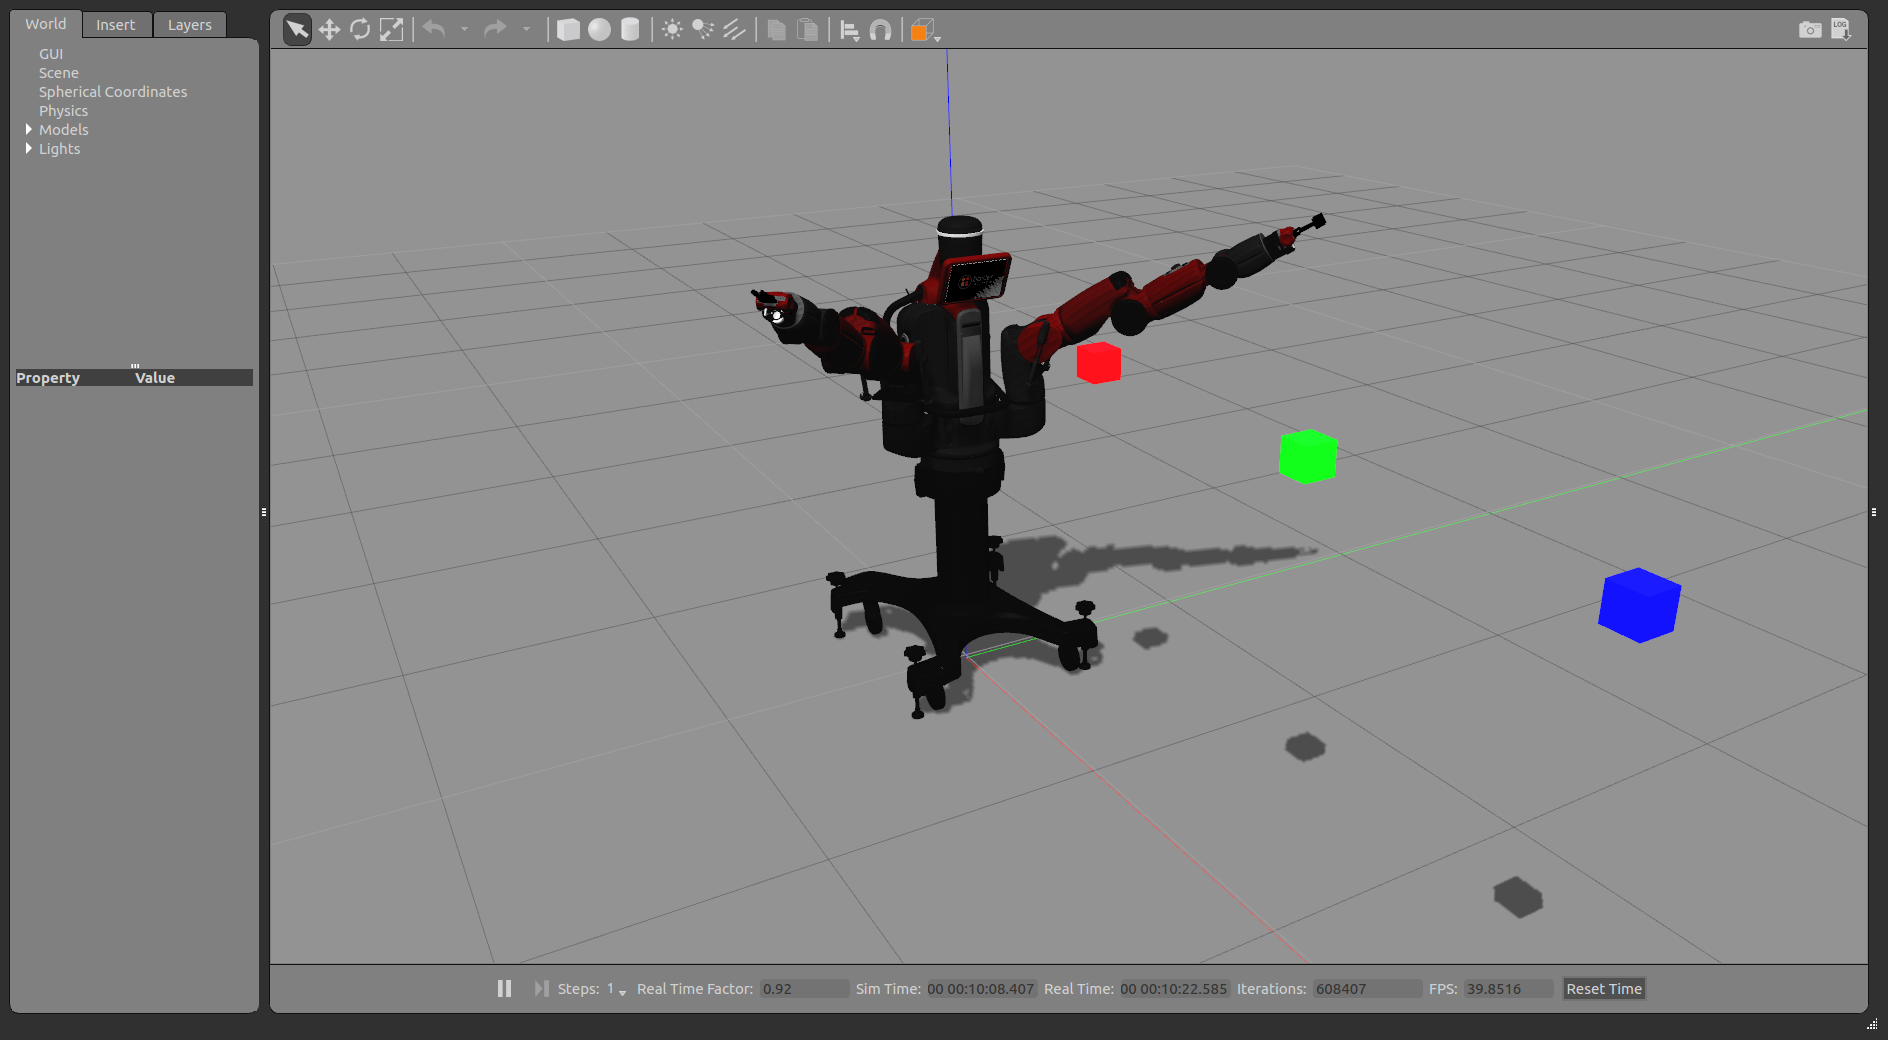

In [13]:
imgName = 'baxter_obj'
os.system("./gazebo_screen.sh %s"%(imgName))
print ("pics/%s.png saved."%(imgName))
Image("pics/%s.png"%(imgName),width=600,height=300)

#### Delete models

In [14]:
objName = 'obj_red'
delete_model(objName)
objName = 'obj_green'
delete_model(objName)
objName = 'obj_blue'
delete_model(objName)

success: True
status_message: "DeleteModel: successfully deleted model"

pics/baxter_noobj.png saved.


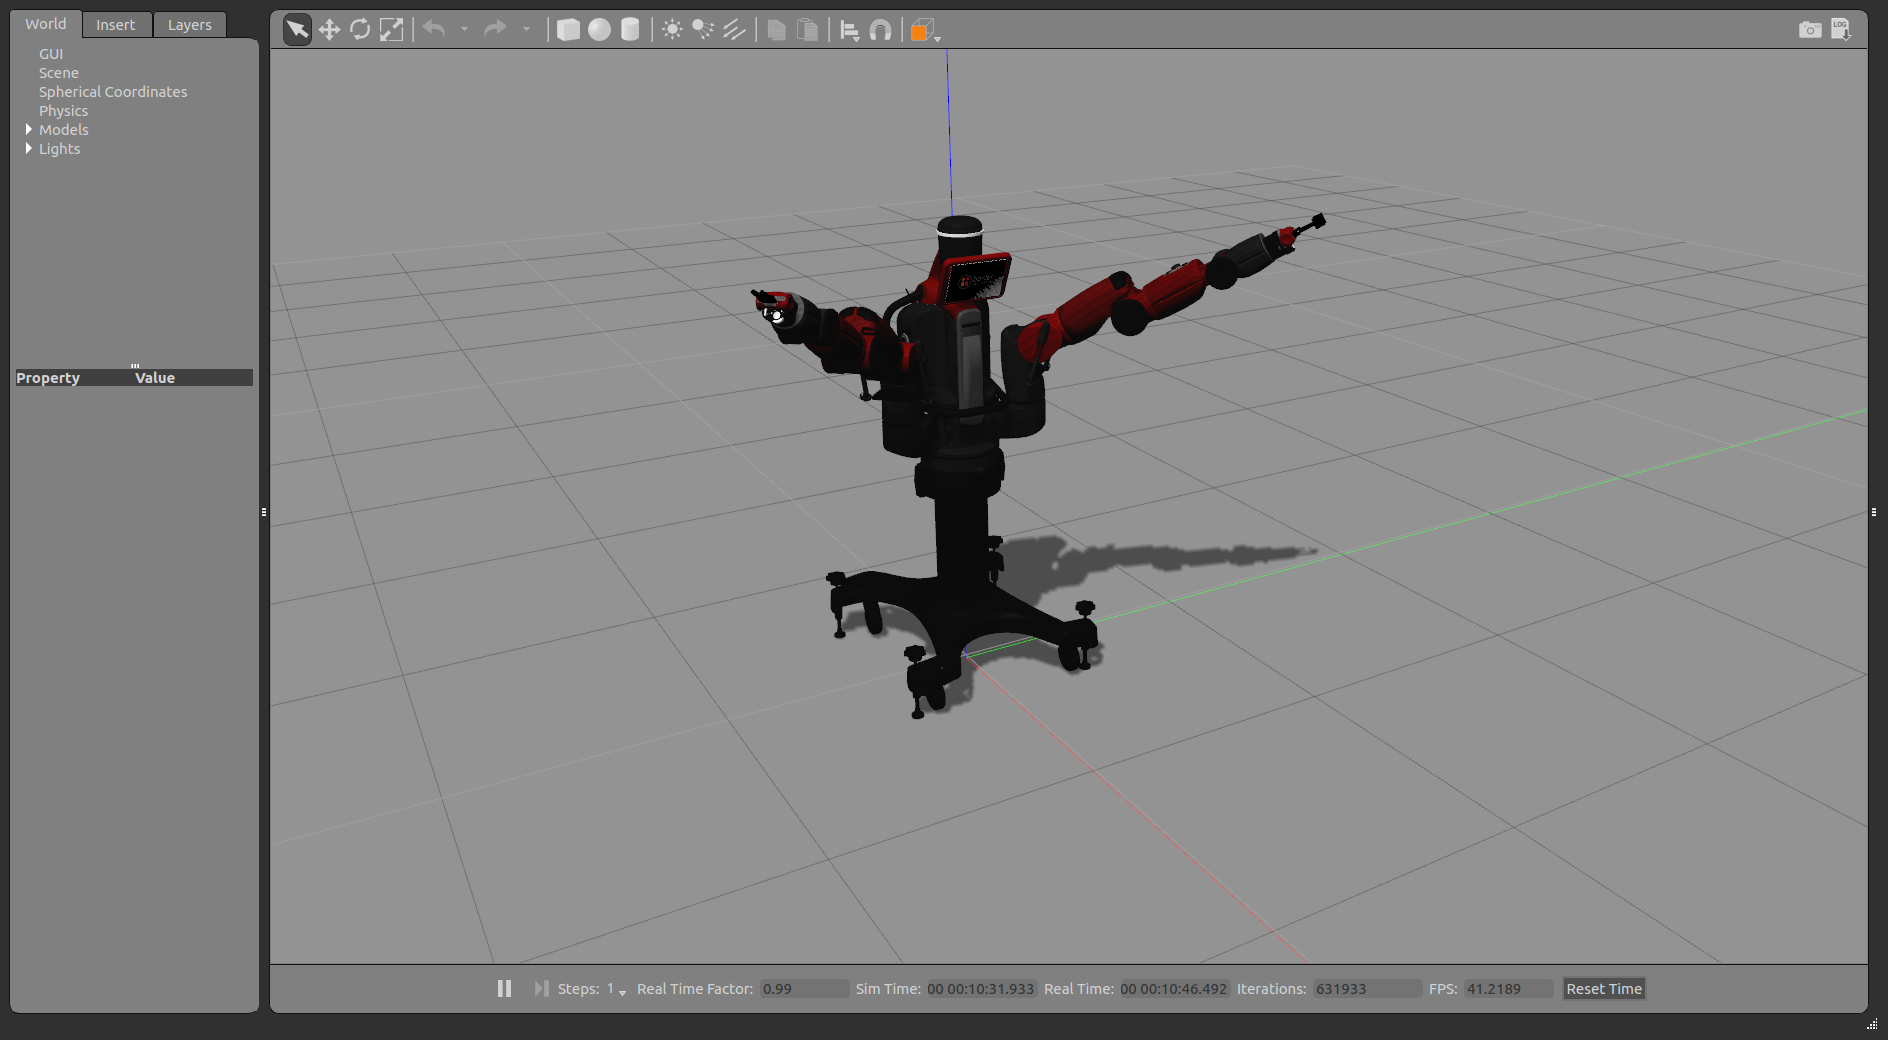

In [15]:
imgName = 'baxter_noobj'
os.system("./gazebo_screen.sh %s"%(imgName))
print ("pics/%s.png saved."%(imgName))
Image("pics/%s.png"%(imgName),width=600,height=300)